

# Classification-Forecast IPO Market and related Trading Strategy

Instead of attempting to predict exactly what the total first day return will be, we are going to attempt to predict if the IPO will be one we should buy for a trade or not. It is here that we should point out this is not investment advice and that this is for illustrative purposes only. Please don't run out and start day trading IPOs with this model willy-nilly. It will end badly. 


- Data acquisition and cleaning 
a.	Importing and cleaning the data downloaded from IPOScoop https://www.iposcoop.com/scoop-track-record-from-2000-to-present/ 
- Data Exploration: 
a.	The bar plots of mean and median of 1st day % change show that the long right tail suggesting heavy returns for potential buyers at offering price 
b.	Can the same be said about purchase done at the opening price? 
- Baseline Strategy: 
Buy all IPOs at their opening price and sell at the closing price 
The result shows a profit of very insignificant amount (~ $27.25) 
Not a very good strategy to work with 

- Feature Engineering: 
a.	The baseline strategy does not account for various important parameters related to the IPO such as: 
the recent performance of the market 
the prestige of the underwriters 
the day/month of the purchase 

- Consideration of these factors is shown to impact the IPO market 
Better strategy : Binary Classification using Logistic Regression 
a.	Applying the logistic regression algorithm after feature engineering results in better results 
b.	The plots show that the returns have increased considerably with the current strategy 


https://github.com/KrishnaChaurasia/Forecasting-IPO-Using-Logistic-Regression
https://github.com/Aarif1430/IPO-Market-prediction-using-logistic-regression/blob/master/Predict_stock_prices/ml_predict_stock.ipynb

## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.2.Handling Categorical Data](#3.2)
    * [4.3.Feature Selection](#3.3)
    * [4.3.Data Transformation](#3.4) 
        * [4.3.1 Rescaling ](#3.4.1)
        * [4.3.2 Standardization](#3.4.2)
        * [4.3.3 Normalization](#3.4.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Common Classification Models](#4.3.1)
        * [5.3.2 Ensemble Models](#4.3.2)
        * [5.3.3 Deep Learning Models](#4.3.3)    
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to under the following
- How to work through a predictive modeling problem end-to-end. This notebook is applicable both for regression and classification problems.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.
- How to use deep Learning methods.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [40]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
import xlrd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [61]:
#https://www.iposcoop.com/scoop-track-record-from-2000-to-present/
wb = xlrd.open_workbook('SCOOP-Rating-Performance.xls')

In [62]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [63]:
ws = wb.sheet_by_index(0)
ws.nrows

3478

In [67]:
ipo_list = []
for i in range(36,ws.nrows):
    if isinstance(ws.row(i)[0].value, float):
        ipo_list.append([x.value for x in ws.row(i)])
    else:
        print(i, ws.row(i))

36 [empty:'', number:2019.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
173 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
174 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
175 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
176 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
177 [empty:'', number:2018.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
348 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', emp

In [72]:
dataset = pd.DataFrame(ipo_list)

In [73]:
dataset.columns = ['Date', 'Company', 'Ticker', 'Managers', \
              'Offer Price', 'Opening Price', '1st Day Close',\
              '1st Day % Chg', '$ Chg Open', '$ Chg Close',\
              'Star Rating', 'Performed']

In [74]:
dataset.head()

Date                                            Company Ticker  \
0  43473.0                                             MMTEC     MTC   
1  43494.0                      Andina Acquisition Corp. III   ANDAU   
2  43495.0  PIMCO Energy & Tactical Credit Opportunities Fund   NRGX   
3  43496.0                               New Fortress Energy     NFE   
4  43496.0                               Pivotal Acquisition   PVT.U   

                                            Managers  Offer Price  \
0                                   WestPark Capital          4.0   
1                  Cowen/ Craig-Hallum Capital Group         10.0   
2  UBS Investment Bank/ BofA Merrill Lynch/ Morga...         20.0   
3                           Morgan Stanley/ Barclays         14.0   
4                                             Cantor         10.0   

   Opening Price  1st Day Close 1st Day % Chg  $ Chg Open  $ Chg Close  \
0           5.91           7.55        0.8875        1.91         3.55   
1          10.00          10.01         0.001        0.00         0.01   
2          20.00          20.20          0.01        0.00         0.20   
3          13.25          13.07    -0.0664286       -0.75        -0.93   
4          10.05          10.10          0.01        0.05         0.10   

  Star Rating Performed  
0         N/C            
1           1            
2           1            
3           1            
4           1

In [75]:
dataset.dtypes

Date             float64
Company           object
Ticker            object
Managers          object
Offer Price      float64
Opening Price    float64
1st Day Close    float64
1st Day % Chg     object
$ Chg Open       float64
$ Chg Close      float64
Star Rating       object
Performed         object
dtype: object

In [76]:
def to_date(x):
    return xlrd.xldate.xldate_as_datetime(x, wb.datemode)

In [77]:
dataset['Date'] = dataset['Date'].apply(to_date)

In [132]:
dataset

dataset['Year'], dataset['Month'], dataset['Day'], dataset['Day of Week'] = \
dataset['Date'].dt.year, dataset['Date'].dt.month, dataset['Date'].dt.day, dataset['Date'].dt.weekday

dataset

by_year_cnt = dataset.groupby('Year')[['Ticker']].count()
by_year_cnt

dataset.iloc[100:110,:]

dataset[dataset['Offer Price'] < 5].index

dataset.drop(dataset[dataset['Offer Price'] < 5].index, inplace=True)

dataset.reset_index(drop=True, inplace=True)

dataset.dtypes

fig, ax = plt.subplots(figsize=(16,8))
by_year_cnt.plot(kind='bar', ax=ax, color='crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict={'size': 18}, y=1.02);

dataset['1st Day % Chg'] = dataset['1st Day % Chg'].astype(float)

dataset.dtypes

dataset['Star Rating'].unique()

dataset['Performed'].unique()

summary_by_year = dataset.groupby('Year')['1st Day % Chg'].describe()
summary_by_year

fig, ax = plt.subplots(figsize=(16,8))
summary_by_year['mean'].plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Percentage Change by Year', fontdict={'size': 18}, y=1.02);

summary_by_year.corr()

dataset['1st Day Open to Close % Chg'] = ((dataset['1st Day Close'] - dataset['Opening Price'])/dataset['Opening Price'])

dataset

dataset['1st Day Open to Close % Chg'].describe()

fig, ax = plt.subplots(figsize=(16,8))
dataset.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close % Change by Year', fontdict={'size': 18}, y=1.02);

mean_delta_by_year = dataset.groupby('Year')[['1st Day Open to Close % Chg']].mean()

mean_delta_by_year.sort_values(ascending=False, by='1st Day Open to Close % Chg')

fig, ax = plt.subplots(figsize=(16,8))
mean_delta_by_year.plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close Percentage Change by Year', fontdict={'size': 18}, y=1.02);

dataset['1st Day Open to Close $ Chg'] = (dataset['1st Day Close'] - dataset['Opening Price'])

dataset[dataset['Year']==2018].sum()

dataset[dataset['Year']==2018]['1st Day Open to Close $ Chg'].describe()

dataset[dataset['Year']==2018]['1st Day Open to Close $ Chg'].sum()

fig, ax = plt.subplots(figsize=(16,8))
dataset[dataset['Year']==2018]['1st Day Open to Close % Chg'].plot(kind='hist', bins=25, ax=ax)

dataset[(dataset['Year']==2018)&(dataset['1st Day Open to Close % Chg']>=.2)]

dataset.groupby(['Year', 'Star Rating'])[['1st Day % Chg']].mean()

fig, ax = plt.subplots(figsize=(8,30))
dataset.groupby(['Year', 'Star Rating'])[['1st Day % Chg']].mean().unstack().plot.barh(width=.75, ax=ax);
ax.legend(loc='best', labels=[1,2,3,4,5,'NC'])
ax.set_xlim(-.5, 2.5)

dataset.groupby(['Year', 'Star Rating'])[['1st Day Open to Close % Chg']].mean()

fig, ax = plt.subplots(figsize=(8,30))
dataset.groupby(['Year', 'Star Rating'])[['1st Day Open to Close % Chg']].mean().unstack().plot.barh(width=.75, ax=ax);
ax.legend(loc='best', labels=[1,2,3,4,5,'NC'])
ax.set_xlim(-.5,.5)

dataset.groupby('Year')['Star Rating'].value_counts().to_frame()

fig, ax = plt.subplots(figsize=(8,30))
dataset.groupby('Year')['Star Rating'].value_counts().unstack().plot.barh(ax=ax);

dataset

dataset['Offer Price'].describe()

dataset['Opening Gap % Chg'] = (dataset['Opening Price'] - dataset['Offer Price'])/dataset['Offer Price']

dataset

dataset['Opening Gap $ Chg'] = (dataset['Opening Price'] - dataset['Offer Price'])

dataset

def get_mgr_count(x):
    return len(x.split('/'))

dataset['Mgr Count'] = dataset['Managers'].apply(get_mgr_count)

dataset

dataset['Mgr Count'].describe().to_frame()

dataset.groupby('Mgr Count')['1st Day Open to Close % Chg'].count().to_frame()

dataset.groupby('Mgr Count')['1st Day Open to Close % Chg'].mean().to_frame().style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

dataset

dataset['Lead Mgr'] = dataset['Managers'].apply(lambda x: x.split('/')[0])

dataset

dataset.groupby('Lead Mgr').agg({'1st Day Open to Close % Chg': ['mean', len]})\
.sort_values(by=('1st Day Open to Close % Chg', 'len'))

dataset['Lead Mgr'].unique()

from patsy import dmatrix

Y = dataset['1st Day Open to Close % Chg'].apply(lambda x: 1 if x > .025 else 0)

X = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'), Treatment) + C(Q('Day of Week'), Treatment)\
+ Q('Mgr Count') + Q('Lead Mgr') + Q('Offer Price') + C(Q('Star Rating'), Treatment)", dataset, return_type="dataframe")

X

KeyError: 'Date'

In [92]:
dataset_new = dataset

In [133]:
dataset = dataset_new

In [134]:
dataset = pd.concat([X, Y], axis=1)

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [135]:
# shape
dataset.shape

(3315, 339)

In [136]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

Intercept  C(Q('Month'), Treatment)[T.2]  C(Q('Month'), Treatment)[T.3]  \
0        1.0                            0.0                            0.0   
1        1.0                            0.0                            0.0   
2        1.0                            0.0                            0.0   
3        1.0                            0.0                            0.0   
4        1.0                            1.0                            0.0   

   C(Q('Month'), Treatment)[T.4]  C(Q('Month'), Treatment)[T.5]  C(Q('Month'), Treatment)[T.6]  \
0                            0.0                            0.0                            0.0   
1                            0.0                            0.0                            0.0   
2                            0.0                            0.0                            0.0   
3                            0.0                            0.0                            0.0   
4                            0.0                            0.0                            0.0   

   C(Q('Month'), Treatment)[T.7]  C(Q('Month'), Treatment)[T.8]  C(Q('Month'), Treatment)[T.9]  \
0                            0.0                            0.0                            0.0   
1                            0.0                            0.0                            0.0   
2                            0.0                            0.0                            0.0   
3                            0.0                            0.0                            0.0   
4                            0.0                            0.0                            0.0   

   C(Q('Month'), Treatment)[T.10]  ...  Q('Lead Mgr')[T.​Jefferies]  \
0                             0.0  ...                          0.0   
1                             0.0  ...                          0.0   
2                             0.0  ...                          0.0   
3                             0.0  ...                          0.0   
4                             0.0  ...                          0.0   

   C(Q('Star Rating'), Treatment)[T.2.0]  C(Q('Star Rating'), Treatment)[T.3.0]  \
0                                    0.0                                    0.0   
1                                    0.0                                    0.0   
2                                    0.0                                    0.0   
3                                    0.0                                    0.0   
4                                    0.0                                    0.0   

   C(Q('Star Rating'), Treatment)[T.4.0]  C(Q('Star Rating'), Treatment)[T.5.0]  \
0                                    0.0                                    0.0   
1                                    0.0                                    0.0   
2                                    0.0                                    0.0   
3                                    0.0                                    0.0   
4                                    0.0                                    0.0   

   C(Q('Star Rating'), Treatment)[T.N/C]  Q('Opening Gap % Chg')  Q('Mgr Count')  \
0                                    0.0                   0.000             2.0   
1                                    0.0                   0.000             6.0   
2                                    0.0                  -0.054             2.0   
3                                    0.0                   0.005             1.0   
4                                    0.0                   0.014             3.0   

   Q('Offer Price')  1st Day Open to Close % Chg  
0              10.0                            0  
1              20.0                            0  
2              14.0                            0  
3              10.0                            0  
4              10.0                            0  

[5 rows x 339 columns]

In [96]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

Intercept                                                                                 float64
C(Q('Month'), Treatment)[T.2]                                                             float64
C(Q('Month'), Treatment)[T.3]                                                             float64
C(Q('Month'), Treatment)[T.4]                                                             float64
C(Q('Month'), Treatment)[T.5]                                                             float64
C(Q('Month'), Treatment)[T.6]                                                             float64
C(Q('Month'), Treatment)[T.7]                                                             float64
C(Q('Month'), Treatment)[T.8]                                                             float64
C(Q('Month'), Treatment)[T.9]                                                             float64
C(Q('Month'), Treatment)[T.10]                                                            float64
C(Q('Month'), Treatm

In [97]:
# describe data
set_option('precision', 3)
dataset.describe()

Intercept  C(Q('Month'), Treatment)[T.2]  C(Q('Month'), Treatment)[T.3]  \
count     3315.0                       3315.000                       3315.000   
mean         1.0                          0.076                          0.065   
std          0.0                          0.265                          0.246   
min          1.0                          0.000                          0.000   
25%          1.0                          0.000                          0.000   
50%          1.0                          0.000                          0.000   
75%          1.0                          0.000                          0.000   
max          1.0                          1.000                          1.000   

       C(Q('Month'), Treatment)[T.4]  C(Q('Month'), Treatment)[T.5]  \
count                       3315.000                       3315.000   
mean                           0.074                          0.100   
std                            0.262                          0.301   
min                            0.000                          0.000   
25%                            0.000                          0.000   
50%                            0.000                          0.000   
75%                            0.000                          0.000   
max                            1.000                          1.000   

       C(Q('Month'), Treatment)[T.6]  C(Q('Month'), Treatment)[T.7]  \
count                       3315.000                       3315.000   
mean                           0.110                          0.102   
std                            0.313                          0.303   
min                            0.000                          0.000   
25%                            0.000                          0.000   
50%                            0.000                          0.000   
75%                            0.000                          0.000   
max                            1.000                          1.000   

       C(Q('Month'), Treatment)[T.8]  C(Q('Month'), Treatment)[T.9]  \
count                       3315.000                       3315.000   
mean                           0.078                          0.063   
std                            0.269                          0.243   
min                            0.000                          0.000   
25%                            0.000                          0.000   
50%                            0.000                          0.000   
75%                            0.000                          0.000   
max                            1.000                          1.000   

       C(Q('Month'), Treatment)[T.10]  ...  Q('Lead Mgr')[T.​Jefferies]  \
count                        3315.000  ...                    3.315e+03   
mean                            0.113  ...                    3.017e-04   
std                             0.317  ...                    1.737e-02   
min                             0.000  ...                    0.000e+00   
25%                             0.000  ...                    0.000e+00   
50%                             0.000  ...                    0.000e+00   
75%                             0.000  ...                    0.000e+00   
max                             1.000  ...                    1.000e+00   

       C(Q('Star Rating'), Treatment)[T.2.0]  C(Q('Star Rating'), Treatment)[T.3.0]  \
count                               3315.000                               3315.000   
mean                                   0.237                                  0.246   
std                                    0.425                                  0.431   
min                                    0.000                                  0.000   
25%                                    0.000                                  0.000   
50%                                    0.000                                  0.000   
75%                                    0.000                   

In [99]:
# class distribution
dataset.groupby('1st Day Open to Close % Chg').size()

1st Day Open to Close % Chg
0    2287
1    1028
dtype: int64

<a id='2.2'></a>
## 3.2. Data Visualization

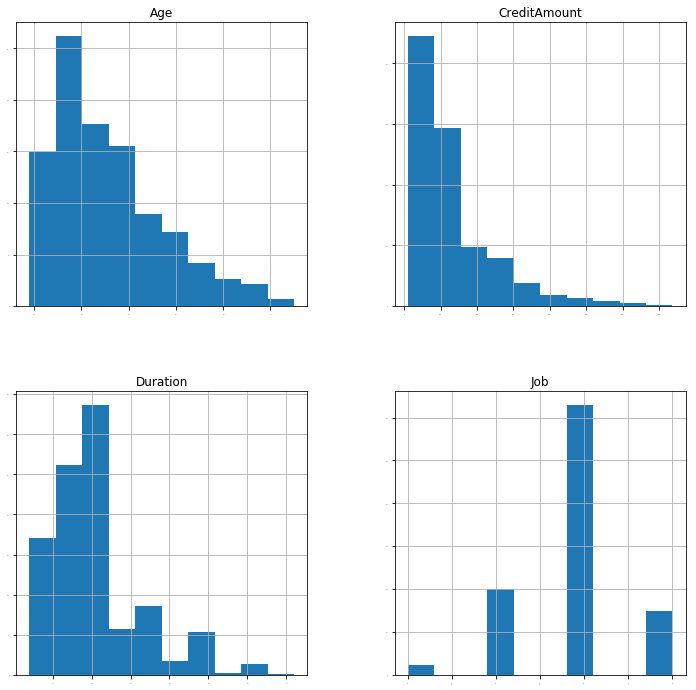

In [37]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

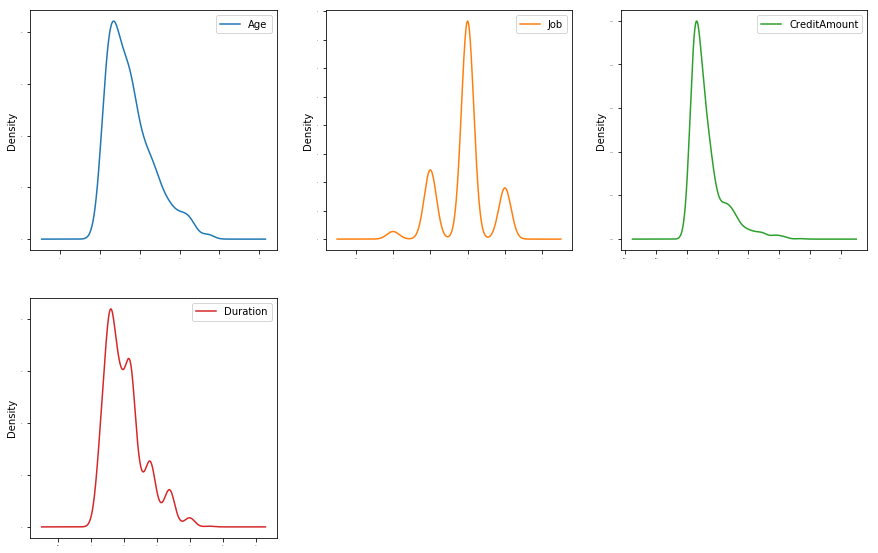

In [38]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

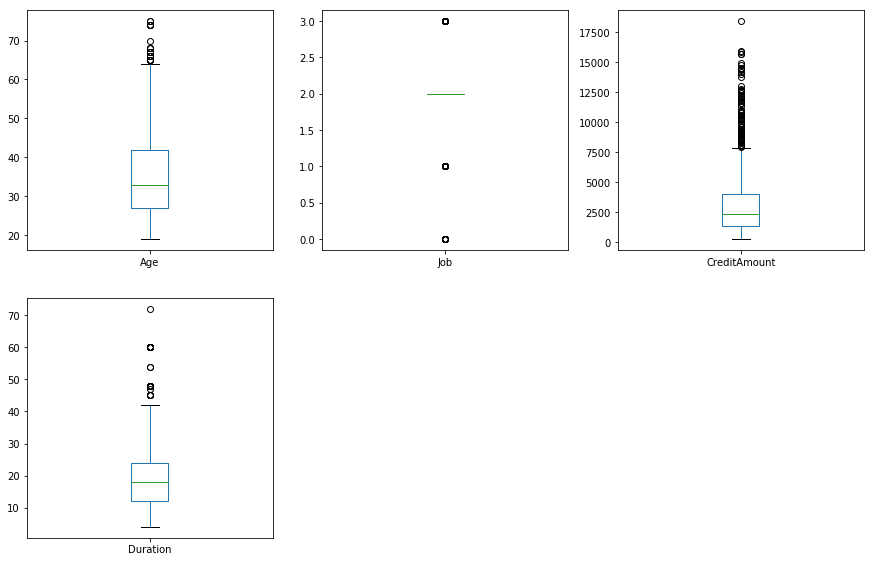

In [39]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

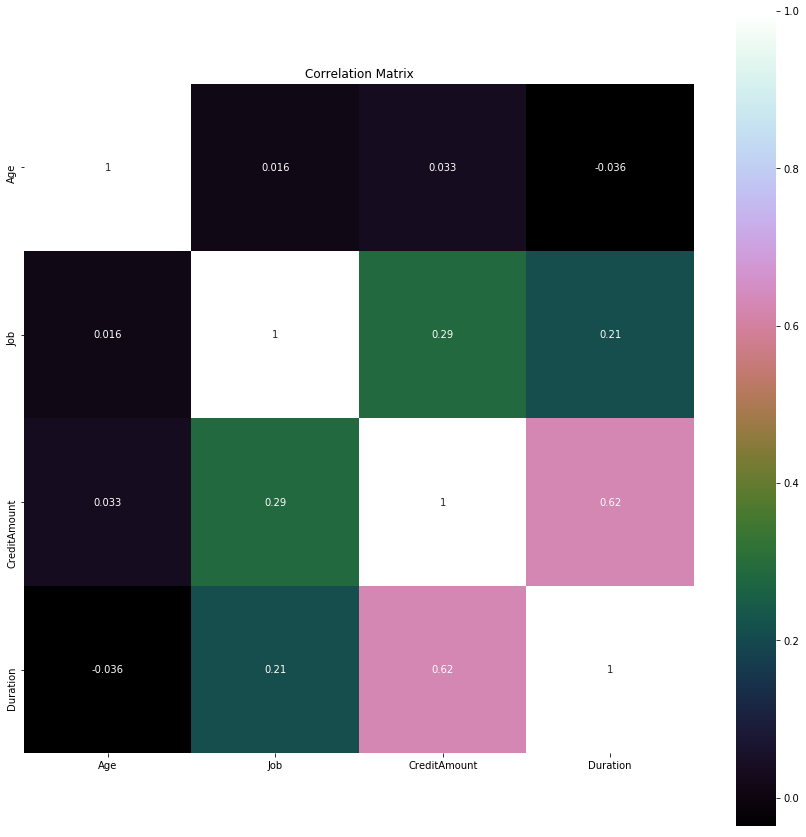

In [40]:
# correlation
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

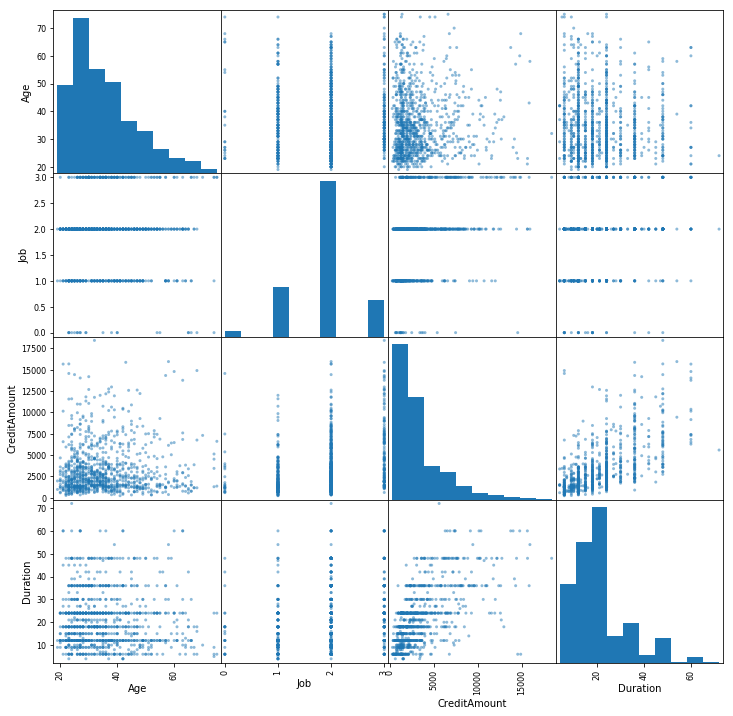

In [41]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()


<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [100]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given that there are null values drop the rown contianing the null values.

In [43]:
# Drop the rows containing NA
dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

Age     Sex  Job Housing SavingAccounts CheckingAccount  CreditAmount  Duration  \
1     22  female    2     own         little        moderate          5951        48   
3     45    male    2    free         little          little          7882        42   
4     53    male    2    free         little          little          4870        24   
7     35    male    3    rent         little        moderate          6948        36   
9     28    male    3     own         little        moderate          5234        30   
10    25  female    2    rent         little        moderate          1295        12   
11    24  female    2    rent         little          little          4308        48   
12    22  female    2     own         little        moderate          1567        12   
13    60    male    1     own         little          little          1199        24   
14    28  female    2    rent         little          little          1403        15   
15    32  female    1     own       moderate          little          1282        24   
18    44  female    3    free         little        moderate         12579        24   
21    44    male    2    rent     quite rich          little          2647         6   
22    48    male    1    rent         little          little          2241        10   
23    44    male    2     own       moderate        moderate          1804        12   
25    36    male    1     own         little          little          1374         6   
27    42  female    2    rent           rich            rich           409        12   
28    34    male    2     own         little        moderate          2415         7   
29    63    male    2     own         little          little          6836        60   
30    36    male    2     own           rich        moderate          1913        18   
31    27    male    2     own         little          little          4020        24   
32    30    male    2     own       moderate        moderate          5866        18   
34    33  female    3     own         little            rich          1474        12   
35    25    male    1     own         little        moderate          4746        45   
37    37    male    2     own         little            rich          2100        18   
38    37    male    2     own         little            rich          1225        10   
39    24    male    2     own         little        moderate           458         9   
41    26    male    2     own     quite rich        moderate          1158        12   
42    44    male    1     own         little        moderate          6204        18   
43    24    male    2    rent       moderate          little          6187        30   
44    58  female    1    free         little          little          6143        48   
47    23  female    0    rent     quite rich          little          1352         6   
51    30    male    3     own         little        moderate          5965        27   
54    57    male    2    free         little        moderate          2225        36   
58    23  female    3     own         little            rich          1961        18   
59    23  female    1    rent         little          little          6229        36   
60    27    male    2     own         little        moderate          1391         9   
62    61    male    3    free         little        moderate          1953        36   
63    25    male    2     own         little        moderate         14421        48   
67    22    male    2     own           rich        moderate          1007        12   
72    51    male    3    free         little          little          1164         8   
73    41  female    1     own         little        moderate          5954        42   
75    66    male    3    free         little          little          1526        12   
76    34    male    2     own         little          little          3965        42   
77    51    male    2     own         little 

<a id='3.2'></a>
## 4.2. Handling Categorical Data

In [44]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["Sex_Code"] = lb_make.fit_transform(dataset["Sex"])
dataset["Housing_Code"] = lb_make.fit_transform(dataset["Housing"])
dataset["SavingAccount_Code"] = lb_make.fit_transform(dataset["SavingAccounts"].fillna('0'))
dataset["CheckingAccount_Code"] = lb_make.fit_transform(dataset["CheckingAccount"].fillna('0'))
dataset["Purpose_Code"] = lb_make.fit_transform(dataset["Purpose"])
dataset["Risk_Code"] = lb_make.fit_transform(dataset["Risk"])
dataset[["Sex", "Sex_Code","Housing","Housing_Code","Risk_Code","Risk"]].head(10)


Sex  Sex_Code Housing  Housing_Code  Risk_Code  Risk
0    male         1     own             1          1  good
1  female         0     own             1          0   bad
2    male         1     own             1          1  good
3    male         1    free             0          1  good
4    male         1    free             0          0   bad
5    male         1    free             0          1  good
6    male         1     own             1          1  good
7    male         1    rent             2          1  good
8    male         1     own             1          1  good
9    male         1     own             1          0   bad

In [ ]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

<a id='3.3'></a>
## 4.3. Feature Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=20)
bestfeatures

SelectKBest(k=20, score_func=<function f_classif at 0x000001B0E20E5378>)

In [107]:
#Y= dataset["Risk_Code"]
#X = dataset.loc[:, dataset.columns != 'Risk_Code']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features


                                           Specs   Score
335                       Q('Opening Gap % Chg')  73.864
331        C(Q('Star Rating'), Treatment)[T.3.0]  40.917
330        C(Q('Star Rating'), Treatment)[T.2.0]  16.507
167                 Q('Lead Mgr')[T.J.P. Morgan]  15.294
119            Q('Lead Mgr')[T.EarlyBirdCapital]  14.901
255          Q('Lead Mgr')[T.Robertson Stephens]  12.902
40          Q('Lead Mgr')[T.BMO Capital Markets]   8.997
63       Q('Lead Mgr')[T.C.E. Unterberg, Towbin]   8.928
88                         Q('Lead Mgr')[T.Citi]   8.202
269        Q('Lead Mgr')[T.Salomon Smith Barney]   7.679
332        C(Q('Star Rating'), Treatment)[T.4.0]   7.454
100  Q('Lead Mgr')[T.Credit Suisse First Boston]   7.337
108    Q('Lead Mgr')[T.Deutsche Banc Alex Brown]   6.690
9                 C(Q('Month'), Treatment)[T.10]   6.379
111    Q('Lead Mgr')[T.Deutsche Bank Securities]   6.365
218               Q('Lead Mgr')[T.Morgan Joseph]   6.328
337                            

As it can be seem from the numbers above Credit Amount is the most important feature followed by duration.

<a id='3.4'></a>
## 4.4. Data Transformation

<a id='3.4.1'></a>
### 4.4.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [49]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
rescaledX.head(5)

0      1      2      3    4    5     6      7      8
0  0.857  0.667  0.051  0.029  1.0  0.5  0.00  0.333  0.714
1  0.054  0.667  0.314  0.647  0.0  0.5  0.25  0.667  0.714
2  0.536  0.333  0.102  0.118  1.0  0.5  0.25  0.000  0.429
3  0.464  0.667  0.420  0.559  1.0  0.0  0.25  0.333  0.571
4  0.607  0.667  0.254  0.294  1.0  0.0  0.25  0.333  0.143

<a id='3.4.2'></a>
### 4.4.2. Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [50]:
from sklearn.preprocessing import StandardScaler
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
StandardisedX.head(5)

0      1      2      3      4      5      6      7      8
0  2.766  0.147 -0.745 -1.236  0.670 -0.134 -1.231 -0.001  1.073
1 -1.191  0.147  0.950  2.248 -1.492 -0.134 -0.197  1.044  1.073
2  1.183 -1.384 -0.417 -0.739  0.670 -0.134 -0.197 -1.046  0.062
3  0.832  0.147  1.634  1.750  0.670 -2.017 -0.197 -0.001  0.567
4  1.535  0.147  0.567  0.257  0.670 -2.017 -0.197 -0.001 -0.950

<a id='3.4.3'></a>
### 4.4.1. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

In [51]:
from sklearn.preprocessing import Normalizer
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
NormalizedX.head(5)

0          1      2      3          4          5          6          7          8
0  0.057  1.708e-03  0.998  0.005  8.540e-04  8.540e-04  0.000e+00  8.540e-04  4.270e-03
1  0.004  3.361e-04  1.000  0.008  0.000e+00  1.680e-04  1.680e-04  3.361e-04  8.402e-04
2  0.023  4.770e-04  1.000  0.006  4.770e-04  4.770e-04  4.770e-04  0.000e+00  1.431e-03
3  0.006  2.537e-04  1.000  0.005  1.269e-04  0.000e+00  1.269e-04  1.269e-04  5.075e-04
4  0.011  4.106e-04  1.000  0.005  2.053e-04  0.000e+00  2.053e-04  2.053e-04  2.053e-04

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [145]:
# split out validation dataset for the end
#Y= dataset["Risk_Code"]
#X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
validation_size = 0.4
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [182]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'recall'
#scoring = 'precision'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1. Common Models

In [183]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [184]:
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

<a id='4.3.3'></a>
### 5.3.3. Deep Learning Model

In [186]:
#Writing the Deep Learning Classifier in case the Deep Learning Flag is Set to True
#Set the following Flag to 1 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Function to create model, required for KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(2, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=1)))

### K-folds cross validation

In [187]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.675730 (0.018890)
LDA: 0.662654 (0.016695)
KNN: 0.644543 (0.016394)
CART: 0.584199 (0.031261)
NB: 0.340366 (0.015277)
SVM: 0.690310 (0.025091)
NN: 0.634508 (0.020544)
AB: 0.666684 (0.022009)
GBM: 0.673732 (0.021732)
RF: 0.664679 (0.024131)
ET: 0.651591 (0.024204)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1790/1790 [==============================] - 1s 442us/step - loss: 0.6267 - acc: 0.6933
Epoch 2/50
1790/1790 [==============================] - 0s 76us/step - loss: 0.6114 - acc: 0.6933
Epoch 3/50
1790/1790 [==============================] - 0s 117us/step - loss: 0.6027 - acc: 0.6933
Epoch 4/50
1790/1790 [==============================] - 0s 103us/step - loss: 0.5952 - acc: 0.6933
Epoch 5/50
1790/1790 [==============================] - 0s 110us/step - loss: 0.5874 - acc: 0.6933
Epoch 6/50
1790/1790 [==============================] - 0s 94us/step - loss: 0.5818 - acc: 0.6933
Epoch 7/50
1790/17

1790/1790 [==============================] - 0s 71us/step - loss: 0.6192 - acc: 0.6899
Epoch 25/50
1790/1790 [==============================] - 0s 70us/step - loss: 0.6193 - acc: 0.6899
Epoch 26/50
1790/1790 [==============================] - 0s 72us/step - loss: 0.6192 - acc: 0.6899
Epoch 27/50
1790/1790 [==============================] - 0s 76us/step - loss: 0.6192 - acc: 0.6899
Epoch 28/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.6192 - acc: 0.6899
Epoch 29/50
1790/1790 [==============================] - 0s 88us/step - loss: 0.6192 - acc: 0.6899
Epoch 30/50
1790/1790 [==============================] - 0s 69us/step - loss: 0.6192 - acc: 0.6899
Epoch 31/50
1790/1790 [==============================] - 0s 72us/step - loss: 0.6192 - acc: 0.6899
Epoch 32/50
1790/1790 [==============================] - 0s 83us/step - loss: 0.6192 - acc: 0.6899
Epoch 33/50
1790/1790 [==============================] - 0s 78us/step - loss: 0.6192 - acc: 0.6899
Epoch 34/50
1790/1790 

1790/1790 [==============================] - 0s 90us/step - loss: 0.6303 - acc: 0.6927
Epoch 6/50
1790/1790 [==============================] - 0s 82us/step - loss: 0.6246 - acc: 0.6927
Epoch 7/50
1790/1790 [==============================] - 0s 77us/step - loss: 0.6213 - acc: 0.6927
Epoch 8/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.6179 - acc: 0.6927
Epoch 9/50
1790/1790 [==============================] - 0s 76us/step - loss: 0.6137 - acc: 0.6944
Epoch 10/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.6100 - acc: 0.6961
Epoch 11/50
1790/1790 [==============================] - 0s 81us/step - loss: 0.6061 - acc: 0.6989
Epoch 12/50
1790/1790 [==============================] - 0s 77us/step - loss: 0.6027 - acc: 0.6994
Epoch 13/50
1790/1790 [==============================] - 0s 80us/step - loss: 0.5993 - acc: 0.7045
Epoch 14/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.5966 - acc: 0.7045
Epoch 15/50
1790/1790 [===

1790/1790 [==============================] - 0s 75us/step - loss: 0.5027 - acc: 0.7492
Epoch 38/50
1790/1790 [==============================] - 0s 77us/step - loss: 0.5008 - acc: 0.7525
Epoch 39/50
1790/1790 [==============================] - 0s 78us/step - loss: 0.4969 - acc: 0.7520
Epoch 40/50
1790/1790 [==============================] - 0s 76us/step - loss: 0.4959 - acc: 0.7542
Epoch 41/50
1790/1790 [==============================] - 0s 77us/step - loss: 0.4956 - acc: 0.7559
Epoch 42/50
1790/1790 [==============================] - 0s 80us/step - loss: 0.4945 - acc: 0.7508
Epoch 43/50
1790/1790 [==============================] - 0s 76us/step - loss: 0.4916 - acc: 0.7615
Epoch 44/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.4889 - acc: 0.7615
Epoch 45/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.4857 - acc: 0.7648
Epoch 46/50
1790/1790 [==============================] - 0s 74us/step - loss: 0.4911 - acc: 0.7570
Epoch 47/50
1790/1790 

1790/1790 [==============================] - 0s 82us/step - loss: 0.5538 - acc: 0.6911
Epoch 19/50
1790/1790 [==============================] - 0s 84us/step - loss: 0.5525 - acc: 0.6911
Epoch 20/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.5503 - acc: 0.6911
Epoch 21/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.5487 - acc: 0.6911
Epoch 22/50
1790/1790 [==============================] - 0s 80us/step - loss: 0.5478 - acc: 0.6911
Epoch 23/50
1790/1790 [==============================] - 0s 81us/step - loss: 0.5451 - acc: 0.6911
Epoch 24/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.5430 - acc: 0.6911
Epoch 25/50
1790/1790 [==============================] - 0s 79us/step - loss: 0.5421 - acc: 0.6961
Epoch 26/50
1790/1790 [==============================] - 0s 80us/step - loss: 0.5415 - acc: 0.7073
Epoch 27/50
1790/1790 [==============================] - 0s 78us/step - loss: 0.5405 - acc: 0.7112
Epoch 28/50
1790/1790 

199/199 [==============================] - 0s 576us/step
Epoch 1/50
1790/1790 [==============================] - 1s 346us/step - loss: 0.6316 - acc: 0.6911
Epoch 2/50
1790/1790 [==============================] - 0s 86us/step - loss: 0.6152 - acc: 0.6911
Epoch 3/50
1790/1790 [==============================] - 0s 97us/step - loss: 0.6053 - acc: 0.6911
Epoch 4/50
1790/1790 [==============================] - 0s 106us/step - loss: 0.5953 - acc: 0.6911
Epoch 5/50
1790/1790 [==============================] - 0s 95us/step - loss: 0.5883 - acc: 0.6911
Epoch 6/50
1790/1790 [==============================] - 0s 98us/step - loss: 0.5797 - acc: 0.6911
Epoch 7/50
1790/1790 [==============================] - 0s 99us/step - loss: 0.5751 - acc: 0.6911
Epoch 8/50
1790/1790 [==============================] - 0s 93us/step - loss: 0.5693 - acc: 0.6911
Epoch 9/50
1790/1790 [==============================] - 0s 102us/step - loss: 0.5637 - acc: 0.6911
Epoch 10/50
1790/1790 [==============================] - 0

1791/1791 [==============================] - 0s 100us/step - loss: 0.5247 - acc: 0.7348
Epoch 32/50
1791/1791 [==============================] - 0s 87us/step - loss: 0.5264 - acc: 0.7337
Epoch 33/50
1791/1791 [==============================] - 0s 88us/step - loss: 0.5230 - acc: 0.7365
Epoch 34/50
1791/1791 [==============================] - 0s 88us/step - loss: 0.5186 - acc: 0.7331
Epoch 35/50
1791/1791 [==============================] - 0s 82us/step - loss: 0.5219 - acc: 0.7348
Epoch 36/50
1791/1791 [==============================] - 0s 87us/step - loss: 0.5204 - acc: 0.7281
Epoch 37/50
1791/1791 [==============================] - 0s 83us/step - loss: 0.5154 - acc: 0.7420
Epoch 38/50
1791/1791 [==============================] - 0s 84us/step - loss: 0.5160 - acc: 0.7314
Epoch 39/50
1791/1791 [==============================] - 0s 82us/step - loss: 0.5120 - acc: 0.7415
Epoch 40/50
1791/1791 [==============================] - 0s 82us/step - loss: 0.5117 - acc: 0.7348
Epoch 41/50
1791/1791

In [180]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#model = LogisticRegression() # rbf is default kernel
#model = GaussianNB() # rbf is default kernel
model = RandomForestClassifier(criterion = 'gini', max_depth = 200, n_estimators =  80)

#model = GradientBoostingClassifier(n_estimators=20, max_depth=5) # rbf is default kernel
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=200, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.665158371040724
[[822  92]
 [352  60]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       914
           1       0.39      0.15      0.21       412

    accuracy                           0.67      1326
   macro avg       0.55      0.52      0.50      1326
weighted avg       0.61      0.67      0.61      1326



### Algorithm comparison

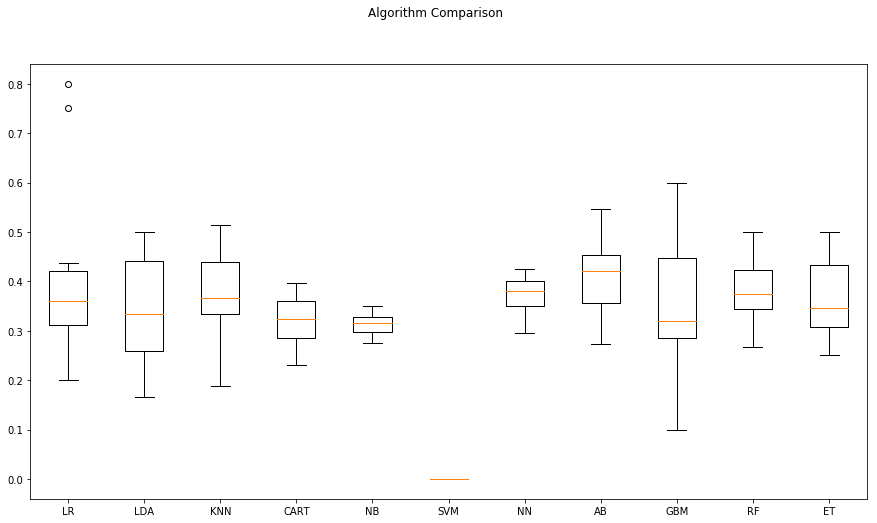

In [158]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

Algorithm Tuning: Although some of the models show the most promising options. the grid search for Gradient Bossting Classifier is shown below.

In [59]:
# 1. Grid search : Logistic Regression Algorithm 
'''
penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

C : float, optional (default=1.0)
Inverse of regularization strength; must be a positive float.Smaller values specify stronger regularization.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
C= np.logspace(-3,3,7)
penalty = ["l1","l2"]# l1 lasso l2 ridge
param_grid = dict(C=C,penalty=penalty )
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.697500 using {'C': 0.1, 'penalty': 'l2'}
#14 0.311250 (0.037687) with: {'C': 0.001, 'penalty': 'l1'}
#13 0.683750 (0.028532) with: {'C': 0.001, 'penalty': 'l2'}
#12 0.688750 (0.037687) with: {'C': 0.01, 'penalty': 'l1'}
#10 0.691250 (0.037102) with: {'C': 0.01, 'penalty': 'l2'}
#10 0.691250 (0.036250) with: {'C': 0.1, 'penalty': 'l1'}
#1 0.697500 (0.039843) with: {'C': 0.1, 'penalty': 'l2'}
#9 0.693750 (0.040020) with: {'C': 1.0, 'penalty': 'l1'}
#8 0.696250 (0.040716) with: {'C': 1.0, 'penalty': 'l2'}
#1 0.697500 (0.042500) with: {'C': 10.0, 'penalty': 'l1'}
#1 0.697500 (0.042500) with: {'C': 10.0, 'penalty': 'l2'}
#1 0.697500 (0.042500) with: {'C': 100.0, 'penalty': 'l1'}
#1 0.697500 (0.042500) with: {'C': 100.0, 'penalty': 'l2'}
#1 0.697500 (0.042500) with: {'C': 1000.0, 'penalty': 'l1'}
#1 0.697500 (0.042500) with: {'C': 1000.0, 'penalty': 'l2'}


In [60]:
# Grid Search : LDA Algorithm 
'''
n_components : int, optional (default=None)
Number of components for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
components  = [1,3,5,7,9,11,13,15,17,19,600]
param_grid = dict(n_components=components)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.696250 using {'n_components': 1}
#1 0.696250 (0.039548) with: {'n_components': 1}
#1 0.696250 (0.039548) with: {'n_components': 3}
#1 0.696250 (0.039548) with: {'n_components': 5}
#1 0.696250 (0.039548) with: {'n_components': 7}
#1 0.696250 (0.039548) with: {'n_components': 9}
#1 0.696250 (0.039548) with: {'n_components': 11}
#1 0.696250 (0.039548) with: {'n_components': 13}
#1 0.696250 (0.039548) with: {'n_components': 15}
#1 0.696250 (0.039548) with: {'n_components': 17}
#1 0.696250 (0.039548) with: {'n_components': 19}
#1 0.696250 (0.039548) with: {'n_components': 600}


In [61]:
# Grid Search KNN algorithm tuning
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for kneighbors queries.

weights : str or callable, optional (default = ‘uniform’)
    weight function used in prediction. Possible values: ‘uniform’, ‘distance’

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights = weights )
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.717500 using {'n_neighbors': 13, 'weights': 'uniform'}
#21 0.648750 (0.040098) with: {'n_neighbors': 1, 'weights': 'uniform'}
#21 0.648750 (0.040098) with: {'n_neighbors': 1, 'weights': 'distance'}
#19 0.667500 (0.049117) with: {'n_neighbors': 3, 'weights': 'uniform'}
#17 0.668750 (0.046519) with: {'n_neighbors': 3, 'weights': 'distance'}
#17 0.668750 (0.036336) with: {'n_neighbors': 5, 'weights': 'uniform'}
#20 0.663750 (0.043102) with: {'n_neighbors': 5, 'weights': 'distance'}
#15 0.680000 (0.041908) with: {'n_neighbors': 7, 'weights': 'uniform'}
#16 0.678750 (0.045775) with: {'n_neighbors': 7, 'weights': 'distance'}
#13 0.696250 (0.057022) with: {'n_neighbors': 9, 'weights': 'uniform'}
#14 0.688750 (0.049513) with: {'n_neighbors': 9, 'weights': 'distance'}
#7 0.710000 (0.051174) with: {'n_neighbors': 11, 'weights': 'uniform'}
#12 0.702500 (0.051174) with: {'n_neighbors': 11, 'weights': 'distance'}
#1 0.717500 (0.039211) with: {'n_neighbors': 13, 'weights': 'uniform'}
#5 0.71

In [62]:
# Grid Search : CART Algorithm 
'''
max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
    or until all leaves contain less than min_samples_split samples.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = np.arange(2, 30)
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.698750 using {'max_depth': 6}
#6 0.687500 (0.039131) with: {'max_depth': 2}
#9 0.682500 (0.041533) with: {'max_depth': 3}
#3 0.693750 (0.042297) with: {'max_depth': 4}
#2 0.695000 (0.038810) with: {'max_depth': 5}
#1 0.698750 (0.048557) with: {'max_depth': 6}
#3 0.693750 (0.052812) with: {'max_depth': 7}
#7 0.686250 (0.056306) with: {'max_depth': 8}
#10 0.681250 (0.039231) with: {'max_depth': 9}
#8 0.685000 (0.060415) with: {'max_depth': 10}
#5 0.691250 (0.057839) with: {'max_depth': 11}
#10 0.681250 (0.065252) with: {'max_depth': 12}
#17 0.670000 (0.060519) with: {'max_depth': 13}
#17 0.670000 (0.064275) with: {'max_depth': 14}
#20 0.668750 (0.053982) with: {'max_depth': 15}
#20 0.668750 (0.058430) with: {'max_depth': 16}
#14 0.672500 (0.057500) with: {'max_depth': 17}
#25 0.663750 (0.068568) with: {'max_depth': 18}
#22 0.667500 (0.060000) with: {'max_depth': 19}
#13 0.673750 (0.063357) with: {'max_depth': 20}
#28 0.655000 (0.064275) with: {'max_depth': 21}
#26 0.658750 (0.058

In [ ]:
# Grid Search : NB algorithm tuning
#GaussianNB only accepts priors as an argument so unless you have some priors to set for your model ahead of time 
#you will have nothing to grid search over.


In [122]:
# Grid Search: SVM algorithm tuning
'''
C : float, optional (default=1.0)
Penalty parameter C of the error term.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. 
It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
Parameters of SVM are C and kernel. 
Try a number of kernels with various values of C with less bias and more bias (less than and greater than 1.0 respectively
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
c_values = [0.1, 1.5]
#kernel_values = ['linear', 'poly', 'rbf']
kernel_values = ['linear']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

KeyboardInterrupt: 

In [64]:
# Grid Search: Ada boost Algorithm Tuning 
'''
n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated. 
    In case of perfect fit, the learning procedure is stopped early.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [10, 100]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.715000 using {'n_estimators': 100}
#2 0.703750 (0.029074) with: {'n_estimators': 10}
#1 0.715000 (0.041003) with: {'n_estimators': 100}


In [163]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,180]
max_depth= [3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.389834 using {'max_depth': 5, 'n_estimators': 180}
#3 0.307986 (0.311609) with: {'max_depth': 3, 'n_estimators': 20}
#2 0.346438 (0.113243) with: {'max_depth': 3, 'n_estimators': 180}
#4 0.303650 (0.082802) with: {'max_depth': 5, 'n_estimators': 20}
#1 0.389834 (0.066974) with: {'max_depth': 5, 'n_estimators': 180}


In [162]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,50,100]
max_depth= [5,100,200]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.444318 using {'criterion': 'gini', 'max_depth': 200, 'n_estimators': 20}
#13 0.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#13 0.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
#13 0.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
#2 0.423894 (0.069594) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 20}
#3 0.410457 (0.093844) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 50}
#8 0.398240 (0.101589) with: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}
#1 0.444318 (0.064565) with: {'criterion': 'gini', 'max_depth': 200, 'n_estimators': 20}
#12 0.357090 (0.092645) with: {'criterion': 'gini', 'max_depth': 200, 'n_estimators': 50}
#9 0.395658 (0.102676) with: {'criterion': 'gini', 'max_depth': 200, 'n_estimators': 100}
#13 0.000000 (0.000000) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#13 0.000000 (0.000000) wi

In [67]:
# Grid Search: ExtraTreesClassifier()
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.737500 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#7 0.708750 (0.037935) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#6 0.711250 (0.043102) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#2 0.733750 (0.037935) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#5 0.717500 (0.044441) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.707500 (0.032210) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#4 0.718750 (0.041174) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#3 0.730000 (0.043012) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.737500 (0.035355) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [68]:
# Grid Search : NN algorithm tuning
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith hidden layer.
Other Parameters that can be tuned
    learning_rate_init : double, optional, default 0.001
        The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
    max_iter : int, optional, default 200
        Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
hidden_layer_sizes=[(20,), (50,), (20,20), (20, 30, 20)]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.725000 using {'hidden_layer_sizes': (20,)}
#1 0.725000 (0.041833) with: {'hidden_layer_sizes': (20,)}
#2 0.717500 (0.041533) with: {'hidden_layer_sizes': (50,)}
#3 0.716250 (0.042592) with: {'hidden_layer_sizes': (20, 20)}
#4 0.683750 (0.040331) with: {'hidden_layer_sizes': (20, 30, 20)}


In [ ]:
# Grid Search : Deep Neural Network algorithm tuning
'''
neurons: int
    Number of patterns shown to the network before the weights are updated.     
batch_size: int
    Number of observation to read at a time and keep in memory.
epochs: int
    Number of times that the entire training dataset is shown to the network during training.
activation:
    The activation function controls the non-linearity of individual neurons and when to fire.
learn_rate :int
    controls how much to update the weight at the end of each batch
momentum : int
     momentum controls how much to let the previous update influence the current weight update
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Hyperparameters that can be modified
neurons = [1, 5, 10, 15]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

#Changing only Neurons for the sake of simplicity
param_grid = dict(neurons=neurons)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

<a id='6'></a>
# 7. Finalise the Model

Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [292]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators=20, max_depth=5) # rbf is default kernel
model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [309]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.255
[[ 51   0]
 [149   0]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        51
           1       0.00      0.00      0.00       149

   micro avg       0.26      0.26      0.26       200
   macro avg       0.13      0.50      0.20       200
weighted avg       0.07      0.26      0.10       200



In [294]:
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [295]:
Y_validation

778    1
334    0
271    1
802    1
216    1
408    1
812    0
94     1
487    1
170    0
24     1
242    0
542    0
930    1
886    1
426    1
125    1
453    1
650    1
913    1
168    1
776    1
572    1
848    1
875    1
590    1
25     1
484    1
705    1
889    1
681    1
13     0
879    1
277    1
316    1
299    1
113    0
962    1
569    0
60     1
713    1
907    1
715    1
725    1
707    0
758    1
339    1
733    1
979    0
99     1
960    1
289    0
974    1
34     1
53     1
319    1
956    1
906    1
786    1
941    1
701    0
454    0
362    1
997    1
164    1
473    1
377    1
372    1
308    0
845    1
587    1
905    1
347    1
689    1
108    1
693    1
256    1
718    1
790    0
472    0
602    0
810    1
929    1
351    0
541    1
228    0
204    1
624    0
782    1
966    0
153    1
676    1
26     1
57     1
46     1
98     1
971    1
739    0
297    1
972    0
493    1
140    1
653    0
643    1
422    1
259    1
888    1
63     0
885    0
954    1
729    1
5

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.
Let us look into the Feature Importance of the GBM model

[0.12173049 0.00929246 0.29864637 0.17190343 0.01309437 0.02368352
 0.06295389 0.24438342 0.05431204]


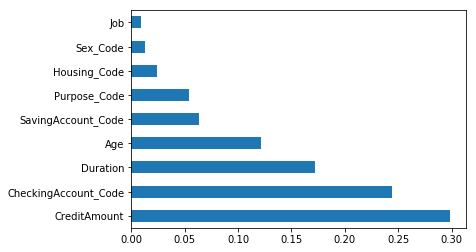

In [296]:
import pandas as pd
import numpy as np
model = GradientBoostingClassifier()
model.fit(rescaledX,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

<a id='6.3'></a>
## 7.3. Save Model for Later Use

In [304]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [308]:
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
result = accuracy_score(Y_validation, predictions)
print(result)

0.765
